## PCA analysis with Scikit-learn digit data

In [2]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns; sns.set()

#### 1. Load the digits dataset from that collection

In [3]:
digits = sklearn.datasets.load_digits()
digits.data.shape

(1797, 64)

#### Plot the image using matplotlib

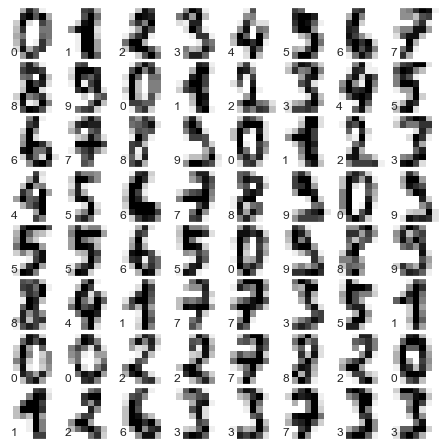

In [5]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [6]:
x = digits.data
y = digits.target
x = StandardScaler().fit_transform(x)
# y = StandardScaler().fit_transform(y)

In [7]:
train_x, test_x,train_y, test_y =train_test_split(x,y, test_size = 0.20, random_state =5)

#### 2. Fit a logistic regression model with 20% test data

In [8]:
lr = LogisticRegression()
lr.fit(train_x, train_y) # train
temp=lr.predict(test_x)

In [9]:
lr.score(test_x, test_y)

0.9611111111111111

In [10]:
metrics.accuracy_score(test_y,temp)

0.9611111111111111

In [13]:
labels = pd.Series(lr.classes_)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_y, temp)
print(pd.DataFrame(cm,columns=labels, index=labels)) # this is get the label names in CM
print('Accuracy: ' + str(abs(accuracy_score(test_y, temp))))

    0   1   2   3   4   5   6   7   8   9
0  35   0   0   0   0   0   0   0   0   0
1   0  34   0   1   0   0   0   0   0   0
2   0   0  36   0   0   0   0   0   0   0
3   0   0   1  35   0   1   0   0   0   0
4   0   2   0   0  29   0   0   1   0   0
5   0   0   0   0   1  43   0   0   0   2
6   0   0   0   0   0   0  29   0   1   0
7   0   0   0   0   0   0   0  41   0   1
8   0   1   0   0   0   0   0   0  36   1
9   0   0   0   0   0   1   0   0   0  28
Accuracy: 0.9611111111111111


#### 3. Perform a PCA transformation

In [16]:
pca = PCA(2)  # project from 64 to 2 dimensions
pca2 = pca.fit_transform(digits.data)
print(digits.data.shape)
print(pca2.shape)

(1797, 64)
(1797, 2)


In [18]:
abs(pca.components_)

array([[4.22770549e-18, 1.73094627e-02, 2.23428824e-01, 1.35913318e-01,
        3.30323170e-02, 9.66340740e-02, 8.32943045e-03, 2.26900131e-03,
        3.20516477e-04, 1.19308895e-01, 2.44451671e-01, 1.48512741e-01,
        4.67319258e-02, 2.17740746e-01, 1.48136741e-02, 4.47779541e-03,
        4.94136466e-05, 7.95419254e-02, 8.33951514e-02, 2.15915334e-01,
        1.72126789e-01, 1.63712102e-01, 2.86444443e-02, 4.23251802e-03,
        9.85488515e-05, 6.42319210e-02, 2.54093326e-01, 3.56771135e-02,
        2.09462567e-01, 4.31311351e-02, 5.13118697e-02, 2.13422730e-04,
        0.00000000e+00, 1.59950887e-01, 3.68690783e-01, 1.64406829e-01,
        8.52007942e-02, 3.72982925e-02, 2.15866963e-02, 0.00000000e+00,
        1.28865588e-03, 1.06945289e-01, 3.03067457e-01, 2.47813050e-01,
        2.09637296e-01, 1.22325258e-02, 3.69458541e-02, 1.61485002e-03,
        6.93023573e-04, 8.35144078e-03, 5.58598935e-02, 9.30534202e-02,
        1.07387722e-01, 1.37734557e-01, 6.32879421e-02, 9.616707

#### Choosing the PCA trasform values

In [19]:
import operator

r = [3.15246256e-17, 1.73094662e-02, 2.23428839e-01, 1.35913299e-01,
        3.30323066e-02, 9.66340917e-02, 8.32944448e-03, 2.26899992e-03,
        3.20516489e-04, 1.19308908e-01, 2.44451677e-01, 1.48512747e-01,
        4.67319383e-02, 2.17740738e-01, 1.48136834e-02, 4.47779454e-03,
        4.94136233e-05, 7.95419401e-02, 8.33951424e-02, 2.15915343e-01,
        1.72126801e-01, 1.63712094e-01, 2.86444421e-02, 4.23251787e-03,
        9.85488655e-05, 6.42319150e-02, 2.54093315e-01, 3.56771032e-02,
        2.09462575e-01, 4.31311501e-02, 5.13118678e-02, 2.13422721e-04,
        0.00000000e+00, 1.59950883e-01, 3.68690776e-01, 1.64406829e-01,
        8.52007910e-02, 3.72982794e-02, 2.15866986e-02, 0.00000000e+00,
        1.28865577e-03, 1.06945283e-01, 3.03067453e-01, 2.47813033e-01,
        2.09637297e-01, 1.22325201e-02, 3.69458472e-02, 1.61485031e-03,
        6.93023463e-04, 8.35144532e-03, 5.58599078e-02, 9.30534128e-02,
        1.07387717e-01, 1.37734568e-01, 6.32879478e-02, 9.61671318e-04,
        9.55078546e-06, 1.40786853e-02, 2.35675493e-01, 1.41225580e-01,
        9.15964273e-03, 8.94184718e-02, 3.65977148e-02, 1.14684952e-02]

c=[]
for i in range(1,64):
    c.append(i)

d = dict(zip(c, r))
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_d )

{35: 0.368690776, 43: 0.303067453, 27: 0.254093315, 44: 0.247813033, 11: 0.244451677, 59: 0.235675493, 3: 0.223428839, 14: 0.217740738, 20: 0.215915343, 45: 0.209637297, 29: 0.209462575, 21: 0.172126801, 36: 0.164406829, 22: 0.163712094, 34: 0.159950883, 12: 0.148512747, 60: 0.14122558, 54: 0.137734568, 4: 0.135913299, 10: 0.119308908, 53: 0.107387717, 42: 0.106945283, 6: 0.0966340917, 52: 0.0930534128, 62: 0.0894184718, 37: 0.085200791, 19: 0.0833951424, 18: 0.0795419401, 26: 0.064231915, 55: 0.0632879478, 51: 0.0558599078, 31: 0.0513118678, 13: 0.0467319383, 30: 0.0431311501, 38: 0.0372982794, 47: 0.0369458472, 63: 0.0365977148, 28: 0.0356771032, 5: 0.0330323066, 23: 0.0286444421, 39: 0.0215866986, 2: 0.0173094662, 15: 0.0148136834, 58: 0.0140786853, 46: 0.0122325201, 61: 0.00915964273, 50: 0.00835144532, 7: 0.00832944448, 16: 0.00447779454, 24: 0.00423251787, 8: 0.00226899992, 48: 0.00161485031, 41: 0.00128865577, 56: 0.000961671318, 49: 0.000693023463, 9: 0.000320516489, 32: 0.0002

In [20]:
#df2 = pd.DataFrame(dic.items())
df_x = pd.DataFrame(digits.data)
df_y = pd.DataFrame(digits.target)

In [21]:
#var = ["35", "43", "27", "44", "11"]
var = [35,43,27,44,11,59,3,14,20,45,29,21,36,22,34,12,60,54,4,10]
df_x = df_x[var]
df_x

,35,43,27,44,11,59,3,14,20,45,29,21,36,22,34,12,60,54,4,10
0,0.0,0.0,0.0,1.0,15.0,13.0,13.0,5.0,0.0,12.0,8.0,11.0,0.0,8.0,8.0,10.0,10.0,0.0,9.0,13.0
1,16.0,16.0,16.0,16.0,11.0,11.0,12.0,0.0,16.0,6.0,2.0,6.0,16.0,0.0,1.0,16.0,16.0,0.0,13.0,0.0
2,13.0,16.0,6.0,5.0,16.0,3.0,4.0,0.0,8.0,0.0,11.0,16.0,15.0,0.0,8.0,15.0,11.0,5.0,15.0,3.0
3,1.0,0.0,15.0,1.0,6.0,13.0,15.0,0.0,13.0,10.0,1.0,0.0,12.0,0.0,0.0,15.0,13.0,9.0,13.0,13.0
4,10.0,16.0,15.0,13.0,7.0,2.0,1.0,0.0,6.0,16.0,9.0,2.0,0.0,2.0,16.0,8.0,16.0,0.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,4.0,0.0,16.0,0.0,14.0,14.0,10.0,3.0,3.0,15.0,16.0,16.0,4.0,4.0,0.0,12.0,15.0,4.0,13.0,16.0
1793,0.0,7.0,0.0,9.0,15.0,16.0,16.0,1.0,0.0,16.0,10.0,13.0,0.0,6.0,16.0,12.0,14.0,1.0,13.0,16.0
1794,16.0,14.0,16.0,16.0,16.0,9.0,11.0,1.0,10.0,15.0,7.0,16.0,16.0,5.0,9.0,8.0,13.0,0.0,15.0,13.0
1795,14.0,0.0,10.0,0.0,16.0,12.0,10.0,1.0,3.0,16.0,16.0,16.0,14.0,7.0,5.0,16.0,16.0,2.0,7.0,14.0


In [22]:
df_x = StandardScaler().fit_transform(df_x)
train_x, test_x,train_y, test_y =train_test_split(df_x,df_y, test_size = 0.20, random_state =5)

#### 4. Fit a logistic regression with the transform data

In [23]:
lr = LogisticRegression()
lr.fit(train_x, train_y) # train
temp=lr.predict(test_x)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
lr.score(test_x, test_y)

0.9138888888888889

In [25]:
metrics.accuracy_score(test_y,temp)

0.9138888888888889

#### 5. Computing the confusion matrix

In [26]:
labels = pd.Series(lr.classes_)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_y, temp)
#print(cm)
print(pd.DataFrame(cm,columns=labels, index=labels)) # this is get the label names in CM
print('Accuracy: ' + str(abs(accuracy_score(test_y, temp))))

    0   1   2   3   4   5   6   7   8   9
0  34   0   0   0   0   1   0   0   0   0
1   0  31   1   0   0   0   0   0   2   1
2   0   0  35   0   0   0   0   0   1   0
3   0   0   1  31   0   2   0   0   3   0
4   0   0   0   0  31   0   0   1   0   0
5   1   0   0   0   1  43   0   0   0   1
6   0   0   0   0   2   0  28   0   0   0
7   0   0   0   0   1   0   0  40   0   1
8   0   2   1   1   0   0   0   0  29   5
9   0   0   0   1   0   0   0   1   0  27
Accuracy: 0.9138888888888889


#### Plot predicted and original label for each of the wrong sample

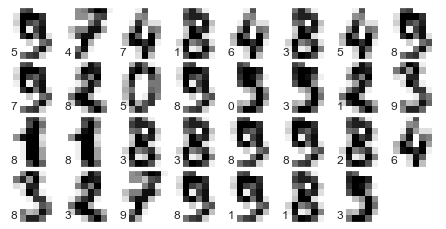

In [28]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
j = 0
for i in range(360):
    data_p = int(temp[i])
    data_A = int(test_y.iloc[i,0])
    
    if(data_p != data_A):
        ax = fig.add_subplot(8, 8, j + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[data_p], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(data_A))
        j = j+1

Image is the actual data the suffix is the predicted value.

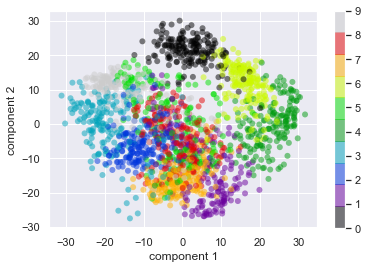

In [29]:
plt.scatter(pca2[:, 0], pca2[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

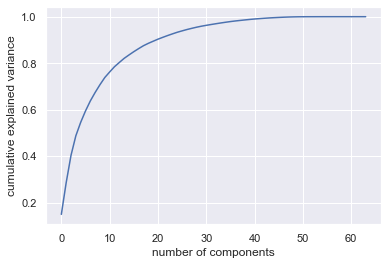

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');